In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset= pd.read_csv("/content/drive/MyDrive/Classification_train.csv")


In [4]:
print(dataset.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      0       0       0       0       0       0       0       0       0   
1      8       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      7       0       0       0       0       0       0       0       0   
4      7       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [ ]:
np.random.seed(42)
dataset = dataset.iloc[np.random.permutation(len(dataset))]

target = dataset.iloc[:, 0]
features = dataset.iloc[:, 1:]

X = features.to_numpy()
y = target.to_numpy()

#scaling
X_n = X/np.max(X)
# Splitting
test_size = 0.1 # 10% for both CV and Test

split_train = int(len(dataset) * (1 - 2 * test_size))
split_cv = int(len(dataset) * (1 - test_size))

X_train = X_n[:split_train]
y_train = y[:split_train]

X_cv = X_n[split_train:split_cv]
y_cv = y[split_train:split_cv]

X_test = X_n[split_cv:]
y_test = y[split_cv:]
print(X_train.shape)

(24000, 784)


In [ ]:
def one_hot_encode(y):
    examples = len(y)
    one_hot_labels = np.zeros((examples, 10))

    for i in range(examples):
        label = y[i]
        one_hot_labels[i, label] = 1

    return one_hot_labels

In [ ]:
y_train_one_hot = one_hot_encode(y_train)
y_cv_one_hot = one_hot_encode(y_cv)
y_test_one_hot = one_hot_encode(y_test)

In [ ]:
print(y_train_one_hot.shape)

(24000, 10)


In [ ]:
def sigmoid(X, W, b):
    z = np.dot(X, W) + b
    sigmoid = 1 / (1 + np.exp(-z))

    return sigmoid

In [ ]:
def predict(X, W, b):

    z = np.dot(X, W) + b
    sigmoid_output = 1 / (1 + np.exp(-z))
    predictions = np.argmax(sigmoid_output, axis=1)

    return predictions


In [ ]:
def compute_cost(X, y, W, b, reg_parameter):
    m = X.shape[0]
    f_wb = sigmoid(X, W, b)

    cost  = np.sum(-y * np.log(f_wb) - (1 - y) * np.log(1 - f_wb))/m

    reg_cost = (reg_parameter / 2*m) * np.sum(W**2)

    total_cost = cost + reg_cost

    return total_cost

In [ ]:
def compute_cost(X, y, W, b, reg_parameter):
    m = X.shape[0]
    f_wb = sigmoid(X, W, b)

    cost = -(np.sum(y * np.log(f_wb) - (1 - y) * np.log(1 - f_wb)))

    return cost/m

In [ ]:
def calc_accuracy(y, y_pred):
    accuracy = np.sum(y == y_pred) / len(y)
    return accuracy


In [ ]:
def compute_gradient(X, y, W, b, reg_parameter):
    m = X.shape[0]

    f_wb = sigmoid(X, W, b)
    errors = f_wb - y

    dj_dw = np.dot(X.T, errors) / m
    dj_db = np.sum(errors, axis=0) / m

    dj_dw += (reg_parameter / m) * W

    return dj_dw, dj_db

def gradient_descent(X,  y_train , y, w_in, b_in, num_iters, alpha, reg_parameter):
    W = w_in
    b = b_in
    acc = []
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, W, b, reg_parameter)
        W -= alpha * dj_dw
        b -= alpha * dj_db

        y_pred  = predict(X_train, W ,b)
        a  =  calc_accuracy(y_train , y_pred)
        acc.append(a)

        if i % 100 == 0:
            cost = compute_cost(X, y, W, b, reg_parameter)
            print(f"Iteration {i}, Cost: {cost}")
            J_history.append(cost)


    cost = compute_cost(X, y, W, b, reg_parameter)
    y_pred  = predict(X_train, W ,b)
    a  =  calc_accuracy(y_train  , y_pred)
    acc.append(a)
    print(f"Iteration {num_iters}, Cost: {cost}")
    J_history.append(cost)

    return W, b, J_history , acc



In [ ]:
w_in = np.zeros((X.shape[1],10))
b_in = np.zeros(10)
alph = 1
iters = 1500

w_out, b_out ,cost_history , acc  = gradient_descent(X_train, y_train ,y_train_one_hot, w_in, b_in,iters, alph , 0)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

print(np.sum(w_out))

Iteration 0, Cost: 5.056075620855609
Iteration 100, Cost: 0.06270784098465346
Iteration 200, Cost: 0.05654328707869073
Iteration 300, Cost: 0.05320539558515389
Iteration 400, Cost: 0.05105763838554212
Iteration 500, Cost: 0.04954099711168221
Iteration 600, Cost: 0.04839501380019219
Iteration 700, Cost: 0.047482355492766415
Iteration 800, Cost: 0.04672524659464703
Iteration 900, Cost: 0.04607705503155688
Iteration 1000, Cost: 0.045508358346783705
Iteration 1100, Cost: 0.044999744983364245
Iteration 1200, Cost: 0.04453791232984751
Iteration 1300, Cost: 0.04411344802817082
Iteration 1400, Cost: 0.04371951020957421
Iteration 1500, Cost: 0.04335458249246991

updated parameters: w:[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], b:[-3.41127227 -0.06539609 -1.49522115 -3.0267906  -2.21056751 -4.26731355
  0.27564028 -1.70805501 -1.35045574 -0.8343597 ]
-449.17429023463774


In [ ]:
def f1_score(y_true, y_pred):
    #True Positives, False Positives, and False Negatives
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    f1_score = 2 * (precision * recall) / (precision + recall)

    return f1_score



In [ ]:
y_pred_train = predict(X_train ,w_out ,b_out)
cost = compute_cost(X_train , one_hot_encode(y_pred_train) ,w_out , b_out ,0)
accuracy = calc_accuracy(y_train ,  y_pred_train )
F = f1_score(y_train, y_pred_train)

print(f"F1 Score: {F}")
print(f"\nAccuracy = {accuracy}")

F1 Score: 0.9875052061640982

Accuracy = 0.9692916666666667


In [ ]:
y_pred_cv = predict(X_cv ,w_out ,b_out)
cost = compute_cost(X_cv , one_hot_encode(y_pred_cv) ,w_out , b_out ,0)
F_cv = f1_score(y_cv, y_pred_cv)
Acc_cv = calc_accuracy(y_cv , y_pred_cv)
print(f'cost on cv = {cost}')
print(f'\nF1 score on cv = {F_cv}')
print(f'\nAccuracy on cv = {Acc_cv}')


cost on cv = 0.013911263085621604

F1 score on cv = 0.9851239669421487

Accuracy on cv = 0.9593333333333334


In [ ]:
y_pred_test = predict(X_test ,w_out ,b_out)
cost = compute_cost(X_test , one_hot_encode(y_pred_test) ,w_out , b_out ,0)
F_test = f1_score(y_test, y_pred_test)
Acc_test = calc_accuracy(y_test , y_pred_test)
print(f'cost on test set = {cost}')
print(f'\nF1 score on test set= {F_test}')
print(f'\nAccuracy on test set = {Acc_test}')


cost on test set = 0.026011124894460263

F1 score on test set= 0.984873949579832

Accuracy on test set = 0.9636666666666667


Text(0.5, 1.0, 'Cost vs Number Of Iterations')

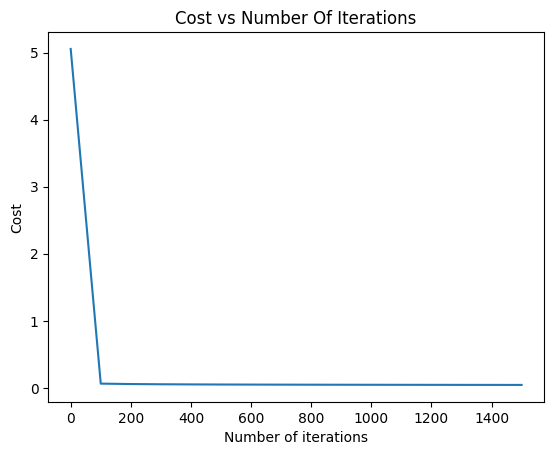

In [ ]:

plt.plot(range(0,1501,100) , cost_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost vs Number Of Iterations")


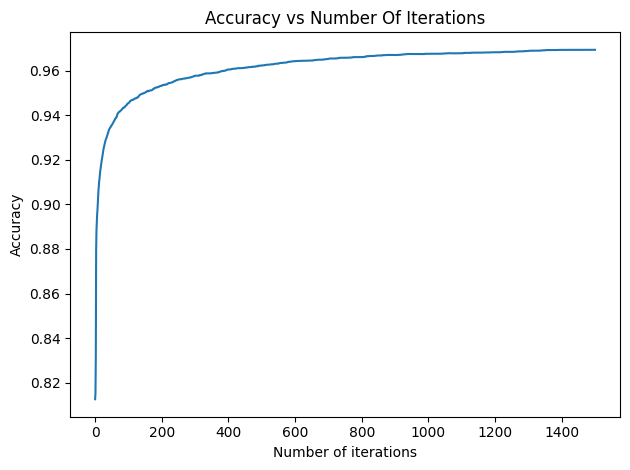

In [ ]:


plt.plot(range(0,1501) , acc)
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number Of Iterations")

plt.tight_layout()

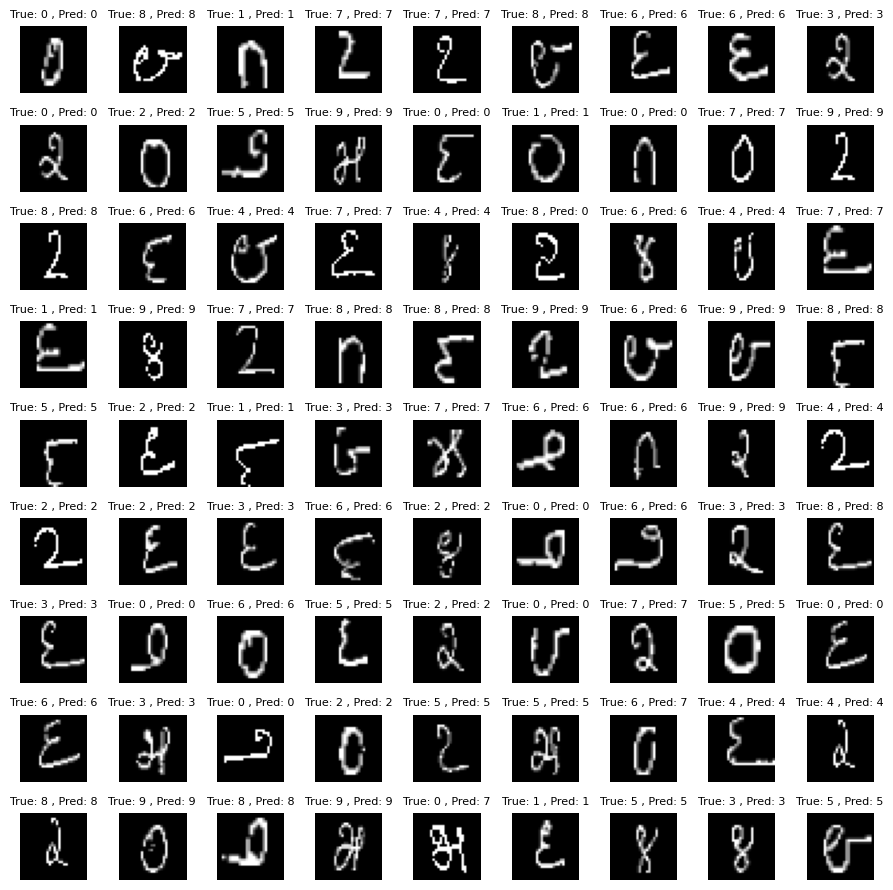

In [ ]:
pixels_train = (X_train*255).reshape(-1,28,28)
fig ,axes = plt.subplots(9 ,9 , figsize = (9,9))
for i in range(9):
  for j in range(9):
    axes[i , j].imshow(pixels_train[i*8 +j] , cmap = "gray")
    axes[i , j].axis("off")
    title = f'True: {y_train[i * 9 + j]} , Pred: {y_pred_train[i * 9 + j]}'
    axes[i, j].set_title(title , fontsize = 8)

plt.tight_layout()
plt.show()


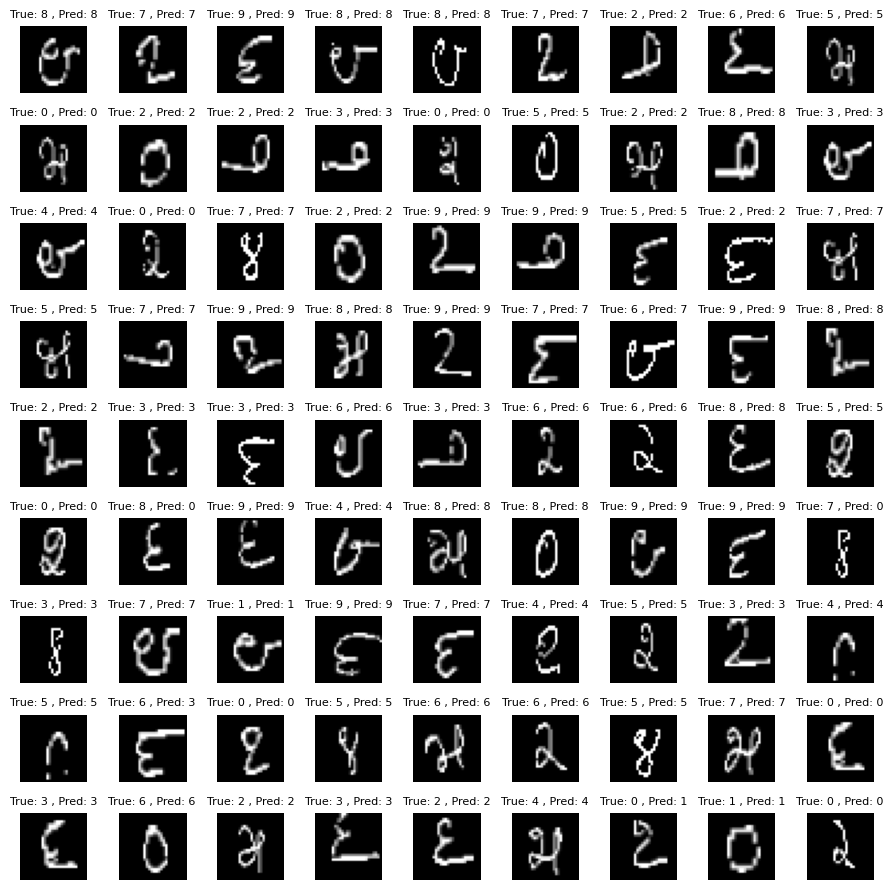

In [ ]:
pixels_test = (X_test*255).reshape(-1,28,28)
fig ,axes = plt.subplots(9 ,9 , figsize = (9,9))
for i in range(9):
  for j in range(9):
    axes[i , j].imshow(pixels_test[i*8 +j] , cmap = "gray")
    axes[i , j].axis("off")
    title = f'True: {y_test[i * 9 + j]} , Pred: {y_pred_test[i * 9 + j]}'
    axes[i, j].set_title(title , fontsize = 8)

plt.tight_layout()
plt.show()


In [6]:
test_data = pd.read_csv("/content/drive/MyDrive/Classification_test.csv")
test_data.head()
X = test_data.iloc[ : , 1 : ].to_numpy()
X = X / 255
y_predicted = predict(X ,w_out ,b_out)
print(y_predicted)
